## RankNet 
RankNet 계열의 알고리즘을 사용할 때는, 네트워크를 변형하여 구성하거나 파라미터 튜닝을 하는 것보다도 pair 생성하고 y를 잘 매칭해주는 작업이 훨씬 중요하다. 

In [1]:
import keras

Init Plugin
Init Graph Optimizer
Init Kernel


In [4]:
import numpy as np
from keras import backend
from keras.layers import Activation, Dense, Input, Subtract
from keras.models import Model, Sequential

In [5]:
def base_network(input_dim):
    model = Sequential()
    model.add(Dense(input_dim, input_shape = (input_dim,),
                    activation='relu'))
    model.add(Dense(100, activation ='relu'))
    model.add(Dense(50, activation ='relu'))
    model.add(Dense(1))
    return model

In [6]:
input_dim = 200
n = 100

In [7]:
# define input 
pre_pair_input = Input(shape = (input_dim,))
post_pair_input = Input(shape =(input_dim,))

# get pair network 
base_model =base_network(input_dim = input_dim)
rel_score = base_model(pre_pair_input)
irr_socre = base_model(post_pair_input)

Metal device set to: Apple M1


2022-01-07 15:34:45.808609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-07 15:34:45.808843: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# subtract each score 
diff = Subtract()([rel_score, irr_socre])

# activate sigmoid function 
prob = Activation('sigmoid')(diff)

In [10]:
diff

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'subtract_1')>

In [11]:
prob

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'activation')>

In [12]:
# build 
model = Model(inputs = [pre_pair_input, post_pair_input],
              outputs = prob)

model.compile(optimizer ='adam', loss ='binary_crossentropy',
              metrics =['accuracy'])

In [14]:
model

In [15]:
# data : a is  
doc_a_features = np.random.uniform(size = (n, input_dim)) + 1
doc_b_features = np.random.uniform(size = (n, input_dim))

y = np.ones((n,1))

In [17]:
doc_a_features

array([[1.56857868, 1.65502958, 1.134054  , ..., 1.22439061, 1.54153488,
        1.73741469],
       [1.47825054, 1.39495449, 1.63976377, ..., 1.88782427, 1.37180242,
        1.97320116],
       [1.01726996, 1.94000686, 1.01608638, ..., 1.84189644, 1.87502719,
        1.95552651],
       ...,
       [1.78621001, 1.17436977, 1.34304665, ..., 1.20636416, 1.83988337,
        1.5850105 ],
       [1.74698261, 1.21155177, 1.92481562, ..., 1.79396616, 1.35724502,
        1.61342267],
       [1.28836018, 1.07161577, 1.5873114 , ..., 1.30376327, 1.97914077,
        1.64325825]])

In [19]:
# train 
history = model.fit([doc_a_features, doc_b_features], y, epochs = 10,
                    batch_size = 100, validation_split=0.2)

2022-01-07 15:43:23.208242: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-07 15:43:23.208652: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-07 15:43:23.335556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.4452 - accuracy: 1.0000 - val_loss: 0.1637 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 29ms/step - loss: 0.1754 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0782 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 28ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 30ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000


2022-01-07 15:43:24.889559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 7/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 28ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 28ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 9.4188e-04 - val_accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 27ms/step - loss: 8.8237e-04 - accuracy: 1.0000 - val_loss: 5.8588e-04 - val_accuracy: 1.0000


In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt 

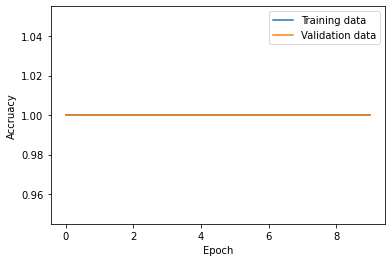

In [21]:
history = history.history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.ylabel('Accruacy')
plt.xlabel('Epoch')
plt.legend(['Training data' ,'Validation data'], loc = 0 )
plt.show()